In [ ]:
# treinar com um arquivo e testar com outro
# normalizar/tratar os dados de acordo com o que ta no matlab
# utilizar o preq atual com os pbess e o soc anteriores

In [1]:
"from google.colab import drive drive.mount('/content/drive')"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
pd.DataFrame([[1, 3, 4], [23, 4543, 22134]], columns = ['amostra 1', 'amostra 2', 'amostra 3'])

,amostra 1,amostra 2,amostra 3
0,1,3,4
1,23,4543,22134


In [2]:
dfTrain = pd.read_csv("Training_dataset6(24_days_subset).csv")
dfTrain.drop(columns=['Unnamed: 0'], inplace=True)

dfTest = pd.read_csv("Testing_dataset6(24_days_subset).csv")
dfTest.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
dfTest

,Unnamed: 0,P_ESS_Request_W_subset,P_ESS_W_subset,P_L_W_subset,P_PV_W_subset,P_U_W_subset,SOC_subset,Time_Diff_s_subset,TimeStamp_subset
0,0,0,20,21023.8,0.0,21043.8,19,5,['15/04/2020 00:00:00']
1,1,0,20,21006.9,0.0,21026.9,19,5,['15/04/2020 00:00:05']
2,2,0,20,20961.2,0.0,20981.2,19,5,['15/04/2020 00:00:10']
3,3,0,30,20983.1,0.0,21013.1,19,5,['15/04/2020 00:00:15']
4,4,0,30,21068.1,0.0,21098.1,19,5,['15/04/2020 00:00:20']
...,...,...,...,...,...,...,...,...,...
17268,17268,0,20,21170.0,0.0,21190.0,19,5,['15/04/2020 23:59:35']
17269,17269,0,20,21201.2,0.0,21221.2,19,5,['15/04/2020 23:59:40']
17270,17270,0,20,21213.8,0.0,21233.8,19,5,['15/04/2020 23:59:45']
17271,17271,0,20,20611.9,0.0,20631.9,19,5,['15/04/2020 23:59:50']


In [5]:
novo_array = []

for t in range(1, len(dfTrain)):
    novo_array.append([dfTrain["P_ESS_Request_W_subset"][t], dfTrain["P_ESS_W_subset"][t - 1], dfTrain["SOC_subset"][t - 1]])

pd.DataFrame(novo_array, columns = ["P_ESS_Request_W_subset", "P_ESS_W_subset", "SOC_subset"])

dfTrain["P_ESS_Request_W_subset"] = dfTrain["P_ESS_Request_W_subset"] / 13800
dfTrain["P_ESS_W_subset"] = dfTrain["P_ESS_W_subset"] / 13800
dfTrain["SOC_subset"] = dfTrain["SOC_subset"] / 100
dfTrain

,P_ESS_Request_W_subset,P_ESS_W_subset,P_L_W_subset,P_PV_W_subset,P_U_W_subset,SOC_subset,Time_Diff_s_subset,TimeStamp_subset
0,0.0,0.001449,20850.0,0.0,20870.0,0.19,5,['16/04/2020 00:00:00']
1,0.0,0.001449,21141.9,0.0,21161.9,0.19,5,['16/04/2020 00:00:05']
2,0.0,0.001449,21134.4,0.0,21154.4,0.19,5,['16/04/2020 00:00:10']
3,0.0,0.001449,20541.9,0.0,20561.9,0.19,5,['16/04/2020 00:00:15']
4,0.0,0.001449,20669.4,0.0,20689.4,0.19,5,['16/04/2020 00:00:20']
...,...,...,...,...,...,...,...,...
69108,0.0,0.001449,20361.9,0.0,20381.9,0.18,5,['19/04/2020 23:59:37']
69109,0.0,0.001449,21463.8,0.0,21483.8,0.18,5,['19/04/2020 23:59:42']
69110,0.0,0.001449,21444.4,0.0,21464.4,0.18,5,['19/04/2020 23:59:47']
69111,0.0,0.001449,21393.1,0.0,21413.1,0.18,5,['19/04/2020 23:59:52']


In [3]:
def normalizarDados(data):
    data["P_ESS_Request_W_subset"] = data["P_ESS_Request_W_subset"] / 13800
    data["P_ESS_W_subset"] = data["P_ESS_W_subset"] / 13800
    data["SOC_subset"] = data["SOC_subset"] / 100

    novo_array = []

    for t in range(1, len(data)):
        novo_array.append([data["P_ESS_Request_W_subset"][t], data["P_ESS_W_subset"][t - 1], data["SOC_subset"][t - 1]])

    return pd.DataFrame(novo_array, columns = ["P_ESS_Request_W_subset", "P_ESS_W_subset", "SOC_subset"])

In [4]:
def plantRocCurve(a, b):
    fpr, tpr, threshold = roc_curve(a, b)
    plt.plot(fpr, tpr)
    plt.xlabel('a')
    plt.ylabel('b')

In [5]:
novoTreino = normalizarDados(dfTrain)
novoTeste = normalizarDados(dfTest)

In [6]:
novoTreino = shuffle(novoTreino)
novoTreino = pd.DataFrame(novoTreino)

novoTeste = shuffle(novoTeste)
novoTeste = pd.DataFrame(novoTeste)

In [6]:
novoTreino

,P_ESS_Request_W_subset,P_ESS_W_subset,SOC_subset
0,0.0,0.001449,0.19
1,0.0,0.001449,0.19
2,0.0,0.001449,0.19
3,0.0,0.001449,0.19
4,0.0,0.001449,0.19
...,...,...,...
69107,0.0,0.001449,0.18
69108,0.0,0.001449,0.18
69109,0.0,0.001449,0.18
69110,0.0,0.001449,0.18


# Modelo 1

In [7]:
X_train = novoTreino.iloc[:, :].values
X_test = novoTeste.iloc[:, :].values

Y_train = novoTreino.iloc[:, 1].values
Y_test = novoTeste.iloc[:, 1].values

In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y_train.reshape(-1,1))
Y_train =  enc.transform(Y_train.reshape(-1,1)).toarray()

enc.fit(Y_test.reshape(-1,1))
Y_test =  enc.transform(Y_test.reshape(-1,1)).toarray()

In [6]:
# sc = StandardScaler()
# X_train_Sc = sc.fit_transform(X_train)
# X_test_Sc = sc.transform(X_test)

In [9]:
# Inicialização
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida
classifier.add( tf.keras.layers.Dense(input_dim = 3, units = 3, kernel_initializer = 'uniform'))
classifier.add( tf.keras.layers.Dense(units = 15, kernel_initializer = 'uniform'))
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 10, kernel_initializer = 'uniform'))
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 5, kernel_initializer = 'uniform'))

# Adicionando a camada de saída
classifier.add( tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform'))

c:\Users\warma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [11]:
hist = classifier.fit(X_train, Y_train, epochs = 600, validation_split = 0.2)

Epoch 1/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.0864e-04 - mse: 5.0864e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 2/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.0277e-04 - mse: 5.0277e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 3/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.0277e-04 - mse: 5.0277e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 4/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.0278e-04 - mse: 5.0278e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 5/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.0277e-04 - mse: 5.0277e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 6/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.0277e-04 - mse: 5.0277e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 7/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.0277e-04 - mse: 5.0277e-04 - val_loss: 5.0277e-04 - val_mse: 5.0277e-04
Epoch 8/600
1728/1728 ━━━━━━━━━━━━━━━━━━━

In [12]:
y_pred = classifier.predict(X_test)

540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


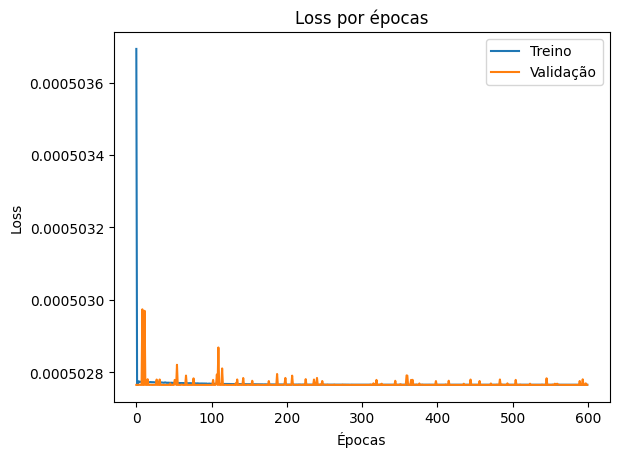

In [13]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

In [20]:
classifier.metrics

TypeError: 'list' object is not callable

In [ ]:
plotRocCurve(y, y_proba)
print(roc_auc_score(y, y_proba))

# Modelo 2

In [14]:
X_train_2 = novoTreino.iloc[:, 0:2].values
X_test_2 = novoTeste.iloc[:, 0:2].values

Y_train_2 = novoTreino.iloc[:, 2].values
Y_test_2 = novoTeste.iloc[:, 2].values

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y_train_2.reshape(-1,1))
Y_train_2 =  enc.transform(Y_train_2.reshape(-1,1)).toarray()

enc.fit(Y_test_2.reshape(-1,1))
Y_test_2 =  enc.transform(Y_test_2.reshape(-1,1)).toarray()

In [11]:
# sc = StandardScaler()
# X_train_Sc = sc.fit_transform(X_train)
# X_test_Sc = sc.transform(X_test)

In [16]:
# Inicialização
classifier_2 = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida
classifier_2.add( tf.keras.layers.Dense(input_dim = 2, units = 2, kernel_initializer = 'uniform'))
classifier_2.add( tf.keras.layers.Dense(units = 10, kernel_initializer = 'uniform'))
classifier_2.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 5, kernel_initializer = 'uniform'))

# Adicionando a camada de saída
classifier_2.add( tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform'))

c:\Users\warma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
classifier_2.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [18]:
hist_2 = classifier_2.fit(X_train_2, Y_train_2, epochs = 600, validation_split = 0.2)

Epoch 1/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 4/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 5/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 6/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 7/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 8/600
1728/1728 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 9/600
1728/1728 ━━━━━━━━━━

In [19]:
y_pred_2 = classifier_2.predict(X_test_2)

540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step


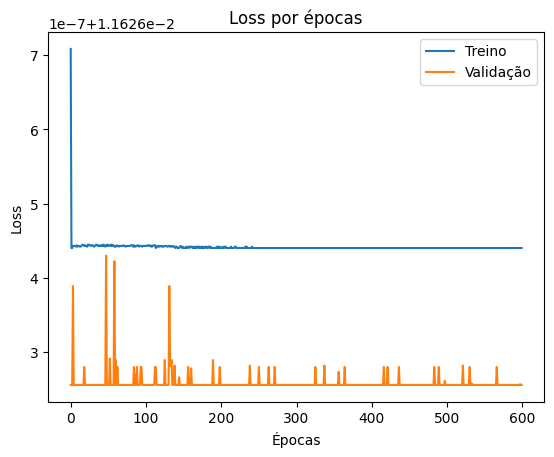

In [20]:
plt.plot(hist_2.history['mse'])
plt.plot(hist_2.history['val_mse'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])